In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dfData = pd.read_csv('ex2data1.txt', names = ['Test 1','Test 2','Accepted'])
dfTarget = dfData['Accepted'] 
'''
Add ones column to features.
'''
intNumSamples = dfData['Test 1'].count()
onesColumn = np.ones(intNumSamples)
dfFeatures = pd.DataFrame({'Bias':onesColumn})
dfFeatures[['Test 1','Test 2']] = dfData[['Test 1','Test 2']]
#dfFeatures['Bias'] = onesColumn # = pd.DataFrame(onesColumn, columns = ['Bias'])
dfFeatures.head()

,Bias,Test 1,Test 2
0,1.0,34.623660,78.024693
1,1.0,30.286711,43.894998
2,1.0,35.847409,72.902198
3,1.0,60.182599,86.308552
4,1.0,79.032736,75.344376


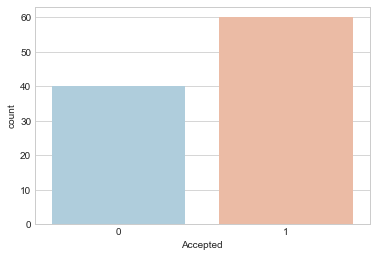

In [3]:
'''
Visualize data.
'''
sns.set_style('whitegrid')
sns.countplot(x = 'Accepted',data = dfData,palette='RdBu_r')

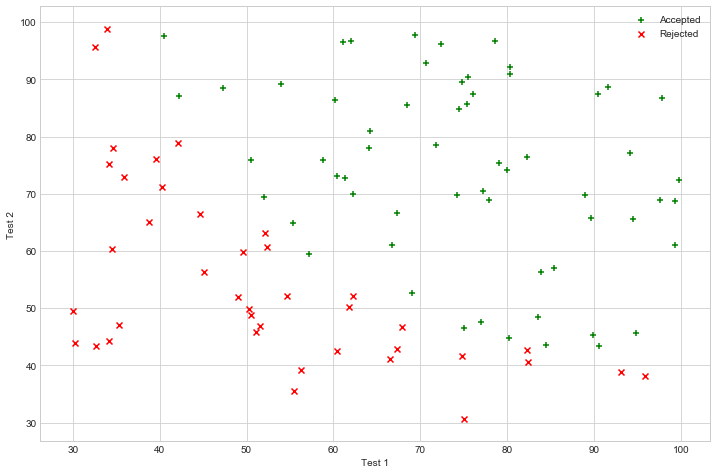

In [4]:
dfAccepted = dfData[dfData['Accepted']==1]
dfRejected = dfData[dfData['Accepted']==0]

fig,axes = plt.subplots(figsize = (12,8))
axes.scatter(dfAccepted['Test 1'],dfAccepted['Test 2'],c='g',marker = '+',label = 'Accepted')
axes.scatter(dfRejected['Test 1'],dfRejected['Test 2'],c ='r',marker = 'x',label ='Rejected')
axes.set_xlabel('Test 1')
axes.set_ylabel('Test 2')
axes.legend()

In [5]:
from scipy import optimize
class LogisticRegression:
    def __init__(self):
        pass
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    def getCost(self,theta,X,y,regFactor = 0):
        theta = np.matrix(theta)
        hypothesis = self.sigmoid(np.dot(X,theta.T))
        intNumSamples = X.shape[0]
        J = -(np.dot(y.T,(np.log(hypothesis))) + np.dot((1-y).T,np.log(1-hypothesis)))/intNumSamples
        '''
        Don't add theta0.
        '''
        R = np.sum(np.square(theta[1:,0]))*regFactor/2/intNumSamples
        J += R
        self.cost = np.array(J)
        return self.cost
    def getGrad(self,theta,X,y,regFactor = 0):
        theta = np.matrix(theta)
        intNumSamples = X.shape[0]
        hypothesis = self.sigmoid(np.dot(X,theta.T))
        error = hypothesis -y
        tempTheta =np.copy(theta)

        tempTheta[:,0] = 0
        '''
        Don't regularize theta0.
        '''
        grad =  np.dot(X.T,error)/intNumSamples + tempTheta.T*regFactor/intNumSamples
        self.grad = np.array(grad).ravel()
        return self.grad
    def optimizeTheta(self,theta,X,y,regFactor):
        self.fmin = optimize.minimize(fun=self.getCost,x0=theta,method = None,jac = self.getGrad,args=(X,y,regFactor))
        return self.fmin
    def predictAcceptance(self,theta,scores):
        return round(100*self.sigmoid(np.dot(scores,theta.T)),2)
    def getTrainAccuracy(self,theta,X,y,threshold):
        intNumSamples = X.shape[0]
        theta = np.matrix(theta)
        '''
        Calculate probability of being admitted.
        '''
        probabilities = self.sigmoid(np.dot(X,theta.T))
        correctPrediction = np.zeros((intNumSamples,1))
        for i in range(0,intNumSamples):
            if probabilities[i] >= threshold:
                '''
                Did the student actually get admitted?
                '''
                if y[i] == 1: correctPrediction[i,0] = 1
            else:
                '''
                Did the student actually not get admitted?
                '''
                if y[i] ==0:correctPrediction[i,0] = 1
        self.probability = 100*correctPrediction.sum()/intNumSamples
        return round(self.probability,2)

In [6]:
X =np.matrix(dfFeatures)
y = np.matrix(dfTarget).T
lm = LogisticRegression()

In [7]:
'''
Testing.
'''
theta =np.zeros(X.shape[1])
regFactor = 0 #unregularized.
lm.getCost(theta,X,y,regFactor)
lm.getGrad(theta,X,y,regFactor)
print('Cost: ' + str(lm.cost))
print('Gradient: ' + str(lm.grad))

Cost: [[0.69314718]]
Gradient: [ -0.1        -12.00921659 -11.26284221]


In [8]:
theta = np.zeros(X.shape[1])
regFactor = 0
'''
Calculate minimum theta using SciPy's optimization library.
'''
fmin = lm.optimizeTheta(theta,X,y,regFactor)
fmin

C:\Users\tmjen\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


      fun: 0.2034977015894438
 hess_inv: array([[ 3.31474479e+03, -2.63892205e+01, -2.70237122e+01],
       [-2.63892205e+01,  2.23869433e-01,  2.02682332e-01],
       [-2.70237122e+01,  2.02682332e-01,  2.35335117e-01]])
      jac: array([-9.52476829e-09, -9.31921322e-07, -2.82608935e-07])
  message: 'Optimization terminated successfully.'
     nfev: 31
      nit: 23
     njev: 31
   status: 0
  success: True
        x: array([-25.16133284,   0.2062317 ,   0.2014716 ])

In [9]:
'''
Use minimum theta to make some predictions.
'''
theta = fmin['x']

score1 = 45
score2 = 85

probAccepted = lm.getTrainAccuracy(theta,X,y,0.5)
print(str(probAccepted) + '% train accuracy.')

trainAccuracy = lm.predictAcceptance(theta, np.array([1,score1,score2]))
print(str(trainAccuracy) + '%% of getting in with test scores of %s%% and %s%%.' %(score1,score2))

89.0% train accuracy.
77.63% of getting in with test scores of 45% and 85%.
